## Simple example
This notebook provides a brief overview of PyJobShop's modeling features for solving scheduling problems, specifically:
- How to model a simple scheduling problem using PyJobShop's `Model` interface,
- How to analyze the resulting solution, and
- How to plot the found solution.

## Scheduling key concepts
Before we get started, let's first review the main three elements of a scheduling problem:

- **Jobs**: a job represents a collection of operations that needs to be completed.
- **Operations**: an operation is a single task of a job that needs to be be processed.
- **Machines**: a machine is a resource that can process operations.

In scheduling, the goal is to schedule all operations such that some objective function is minimized, which is based on the job completion times.
Scheduling an operation means that we have to decide for each operation which machine it is assigned to, as well as its start and completion times.

## Model
Let's now get started!

To define a scheduling problem, we use PyJobShop's `Model` interface, which allows us to conveniently define scheduling problems without having to know what happens under the hood. We first import the class and then initialize an instance of the model.

In [41]:
from pyjobshop import Model

model = Model()

We now add four jobs, each consisting of two operations.

In [42]:
jobs = [model.add_job() for _ in range(4)]
operations = [[model.add_operation(job=job) for _ in range(2)] for job in jobs]

Passing the `job` argument to `m.add_operation(job=job)` ensures that the created operation belongs to the right job.
Next, we have to create the machines and also specify processing times for each operation.

In [43]:
machines = [model.add_machine() for _ in range(2)]

for job in range(len(jobs)):
    for idx, operation in enumerate(operations[job]):
        duration = 1 if idx == 0 else 2
        model.add_processing_time(machines[idx], operation, duration)

In this case, the processing time for the first operation of a job is one, and the processing time for the second operation is two.

Now that we have defined all important elements, we can now solve this model:

In [46]:
result = model.solve()

The result variables stores a `Result` object that contains information about the solving progress and the best-found solution.

A solution consists of `Task`s, which stores for each operation the assigned machine, the start time, and the duration.

In [45]:
for task in result.best.schedule:
    print(task)

Task(operation=0, machine=0, start=1, duration=1)
Task(operation=1, machine=1, start=2, duration=2)
Task(operation=2, machine=0, start=2, duration=1)
Task(operation=3, machine=1, start=4, duration=2)
Task(operation=4, machine=0, start=3, duration=1)
Task(operation=5, machine=1, start=6, duration=2)
Task(operation=6, machine=0, start=0, duration=1)
Task(operation=7, machine=1, start=0, duration=2)


Each scheduled operation can now be nicely plotted in a Gantt chart.

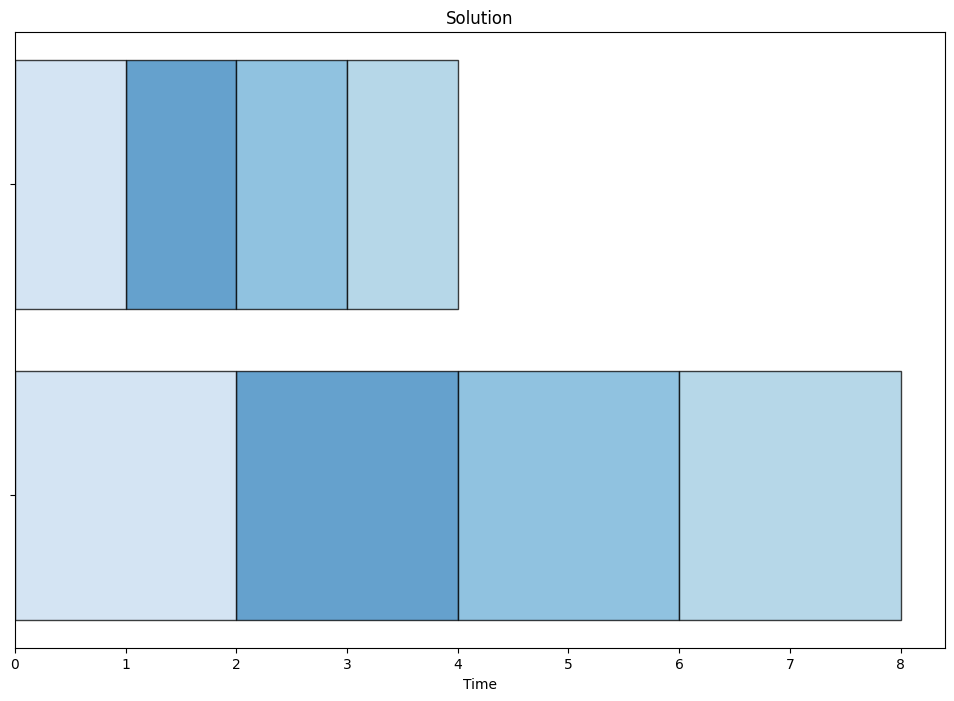

In [50]:
from pyjobshop import plot

data = model.data()
plot(data, result.best)

Operations belonging to the same job have the same color.

## Conclusion

For more details about `Model`, see the [API documentation](https://pyjobshop.readthedocs.io/en/latest/api/pyjobshop.html#pyjobshop.Model.Model).